In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm

In [2]:
dfd = pd.read_pickle('/home/icb/manuel.gander/Atl/data/Synched_aucs.pkl')
dfd = dfd.drop_duplicates(['PubChem_CID', 'Dr_repr_name']).copy()
D_dr_rep = dict(zip(dfd['PubChem_CID'], dfd['Dr_repr_name']))

In [3]:
mypath='/home/icb/manuel.gander/Atl/data/dones_sub_new'
keys=listdir(mypath)
if '.ipynb_checkpoints' in keys:
    keys.remove('.ipynb_checkpoints')
len(keys)

784

In [4]:
7*7*4*4

784

In [5]:
frames = []
for k in tqdm(keys):
    df = pd.read_pickle(mypath+'/'+k)
    frames.append(df)
Df = pd.concat(frames, ignore_index=True)
del Df['source']
del Df['dataset']

100%|█████████████████████████████████████████████████████████████████████| 784/784 [00:31<00:00, 25.00it/s]


In [6]:
Df['seed'] = Df['seed'].astype('category')
Df['fraction'] = Df['fr'].astype('category')

In [7]:
df = Df.groupby(['PubChem_CID', 'alpha', 'fraction', 'seed', 'l1_ratio']).mean().reset_index()
df = df[np.isfinite(df['pearsons'])]
df['drug_repr'] = df['PubChem_CID'].map(D_dr_rep)
df['RMSE_ratio'] = df['RMSE']/df['RMSE_mean_model']
df.sort_values('pearsons')

/tmp/ipykernel_2567804/290566527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = Df.groupby(['PubChem_CID', 'alpha', 'fraction', 'seed', 'l1_ratio']).mean().reset_index()


,PubChem_CID,alpha,fraction,seed,l1_ratio,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,ind,n_ccls,fr,kn,drug_repr,RMSE_ratio
6619,11455910,0.30,0.25,1,0.50,-0.507255,-0.291783,1.000402,0.077262,0.077236,49.5,66.0,0.25,1.000000e+09,TW-37,1.000344
22631,208908,10.00,0.25,1,0.01,-0.463264,-0.447826,1.000059,0.084698,0.084695,49.5,136.0,0.25,1.000000e+09,lapatinib,1.000043
22409,208908,1.00,0.25,1,0.10,-0.463264,-0.447826,1.000101,0.084701,0.084695,49.5,136.0,0.25,1.000000e+09,lapatinib,1.000074
14460,126941,0.30,0.25,1,0.90,-0.452319,-0.414035,1.000055,0.212000,0.211990,49.5,116.0,0.25,1.000000e+09,methotrexate,1.000045
41246,445063,1.00,0.50,0,0.10,-0.394392,-0.491282,1.000156,0.097311,0.097299,49.5,97.0,0.50,1.000000e+09,nan,1.000124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66992,90659141,0.30,0.25,2,0.10,0.777380,0.720152,0.655354,0.100813,0.156333,49.5,100.0,0.25,1.000000e+09,teniposide,0.644864
52353,5494449,3.00,0.50,3,0.01,0.778690,0.712562,0.633650,0.103974,0.161740,49.5,66.0,0.50,1.000000e+09,tozasertib,0.642846
66771,90659141,0.03,0.25,2,0.90,0.780776,0.723332,0.655005,0.099886,0.156333,49.5,100.0,0.25,1.000000e+09,teniposide,0.638931
66881,90659141,0.10,0.25,2,0.30,0.781242,0.724805,0.653298,0.100044,0.156333,49.5,100.0,0.25,1.000000e+09,teniposide,0.639943


<Axes: xlabel='RMSE_ratio', ylabel='pearsons'>

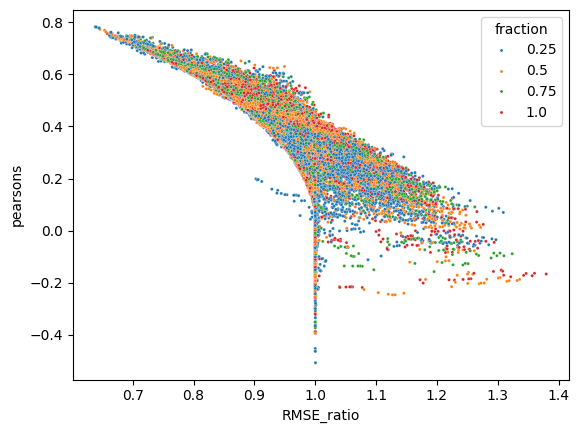

In [8]:
sns.scatterplot(data=df, x='RMSE_ratio', y='pearsons', s=5, hue='fraction')

In [9]:
# Pick the one with the best l1_ratio and alpha
crit = 'RMSE_ratio'
crit = 'pearsons'

alphas = sorted(set(df['alpha']))
l1_ratios = sorted(set(df['l1_ratio']))
fractions = sorted(set(df['fraction']))
seeds = sorted(set(df['seed']))

frames = []
for fraction in fractions:
    for seed in seeds:
        dfs = df[(df['seed']==seed)&(df['fraction']==fraction)].copy()
        drugs = sorted(set(dfs['PubChem_CID']))
        for d in drugs:
            dfss = dfs[dfs['PubChem_CID']==d]
            if crit=='RMSE_ratio':
                frames.append(dfss.sort_values(crit).iloc[:1])
            else:
                frames.append(dfss.sort_values(crit).iloc[-1:])
dfm = pd.concat(frames, ignore_index=True)
dfm.sort_values('pearsons')

,PubChem_CID,alpha,fraction,seed,l1_ratio,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,ind,n_ccls,fr,kn,drug_repr,RMSE_ratio
407,445063,0.01,0.50,0,0.01,-0.160302,-0.161736,1.312351,0.121803,0.097299,49.5,97.0,0.50,1.000000e+09,nan,1.251843
1346,445063,0.01,1.00,2,0.01,-0.151713,-0.097242,1.369791,0.123091,0.094274,49.5,173.0,1.00,1.000000e+09,nan,1.305679
970,445063,0.03,0.75,2,0.01,-0.077736,0.011860,1.309617,0.120649,0.096147,49.5,140.0,0.75,1.000000e+09,nan,1.254837
1440,445063,0.03,1.00,3,0.90,-0.033191,0.030274,1.051245,0.092558,0.088888,49.5,145.0,1.00,1.000000e+09,nan,1.041285
1064,445063,0.01,0.75,3,0.30,-0.025805,0.036179,1.324824,0.113947,0.093169,49.5,121.0,0.75,1.000000e+09,nan,1.223018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,4212,3.00,0.25,1,0.01,0.750621,0.586210,0.699608,0.122336,0.183875,49.5,111.0,0.25,1.000000e+09,mitoxantrone,0.665320
1339,397888,0.03,1.00,2,0.90,0.756100,0.728250,0.662292,0.143676,0.218295,49.5,307.0,1.00,1.000000e+09,LMP744,0.658176
11,11707110,1.00,0.25,0,0.01,0.756534,0.723803,0.663931,0.118441,0.177868,49.5,144.0,0.25,1.000000e+09,trametinib,0.665888
702,5494449,3.00,0.50,3,0.01,0.778690,0.712562,0.633650,0.103974,0.161740,49.5,66.0,0.50,1.000000e+09,tozasertib,0.642846


In [10]:
plt.rcParams['figure.dpi'] = 300

(0.1, 0.8)

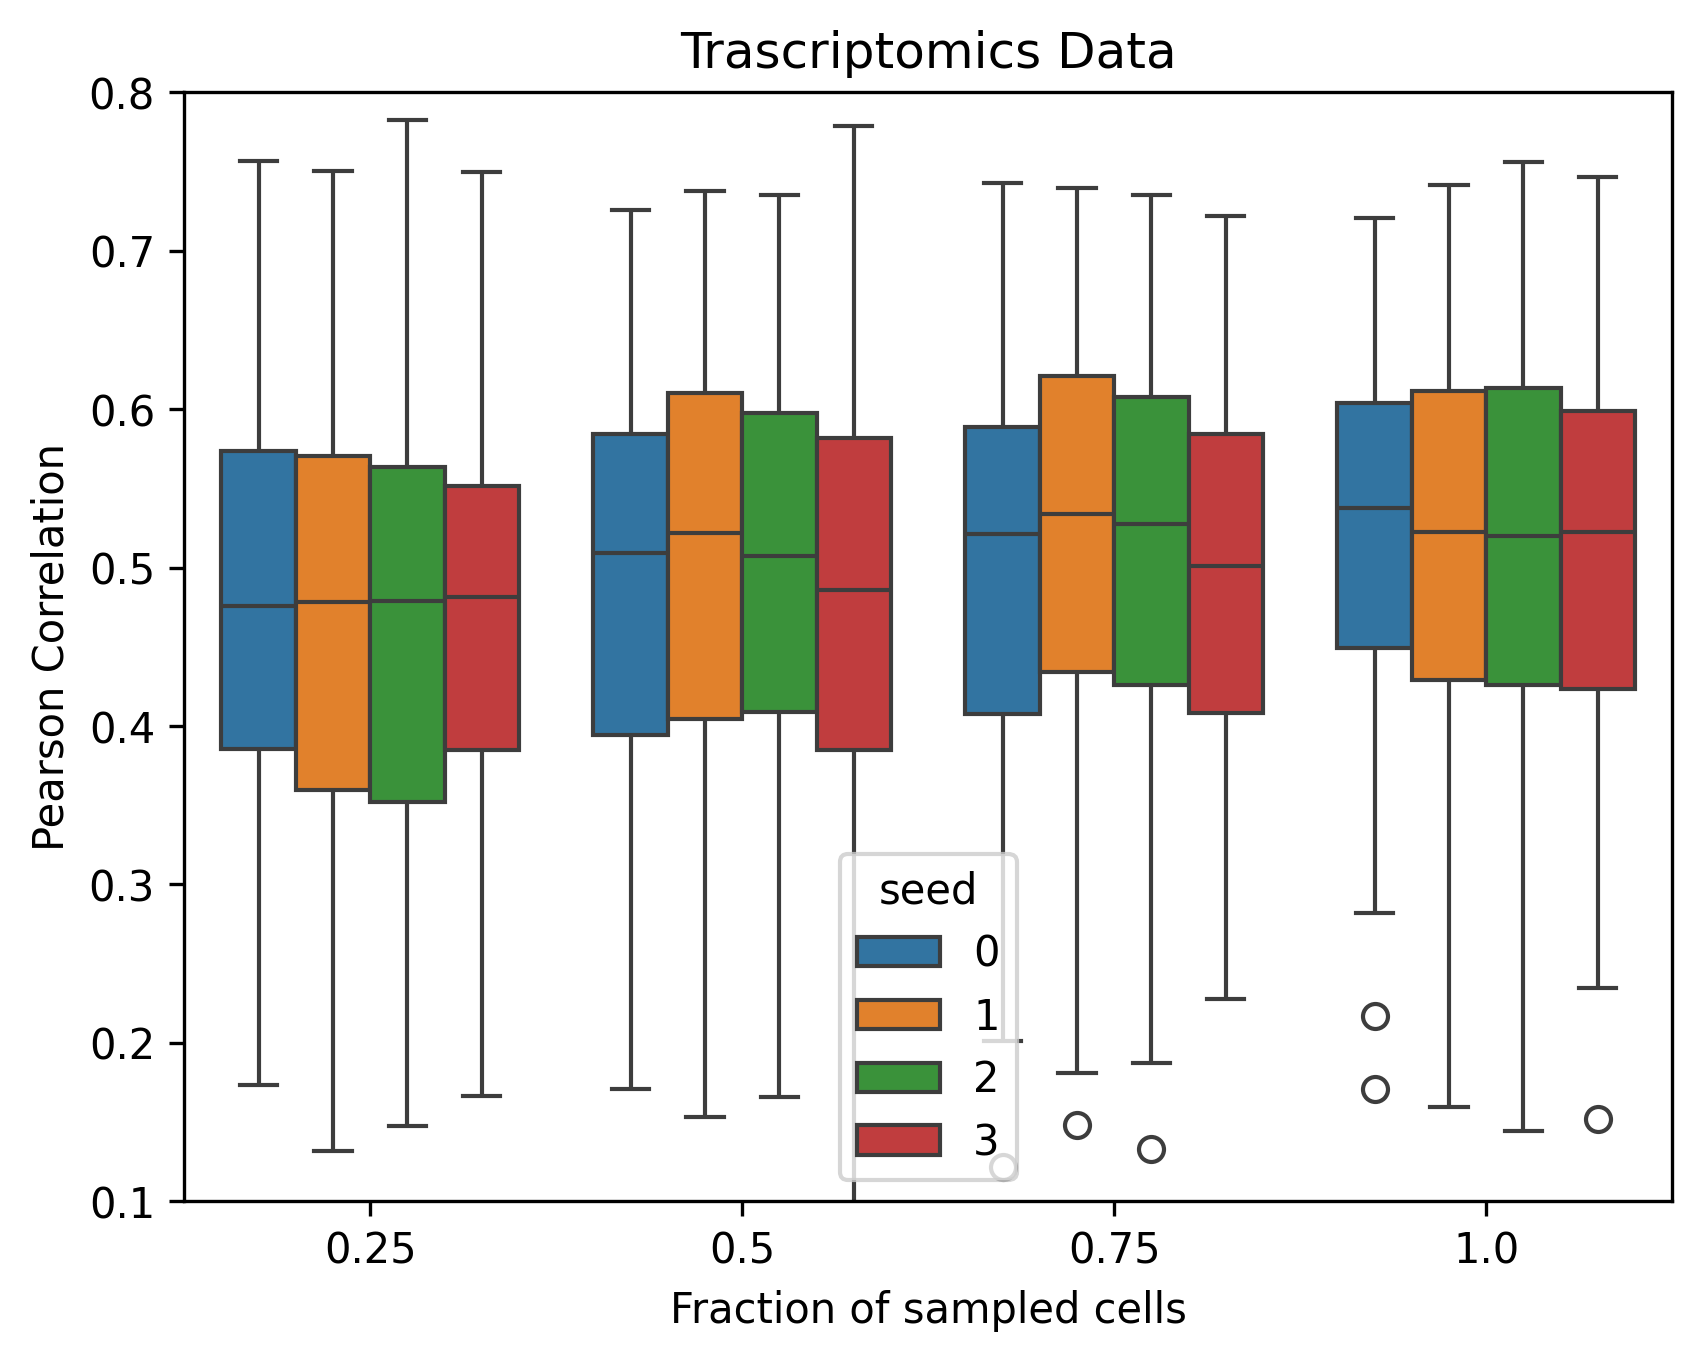

In [11]:
sns.boxplot(data=dfm, y='pearsons', x='fraction', hue='seed')
plt.ylabel('Pearson Correlation')
plt.xlabel('Fraction of sampled cells')
plt.title('Trascriptomics Data')
plt.ylim(0.1, 0.8)

Text(0.5, 1.0, 'Trascriptomics Data')

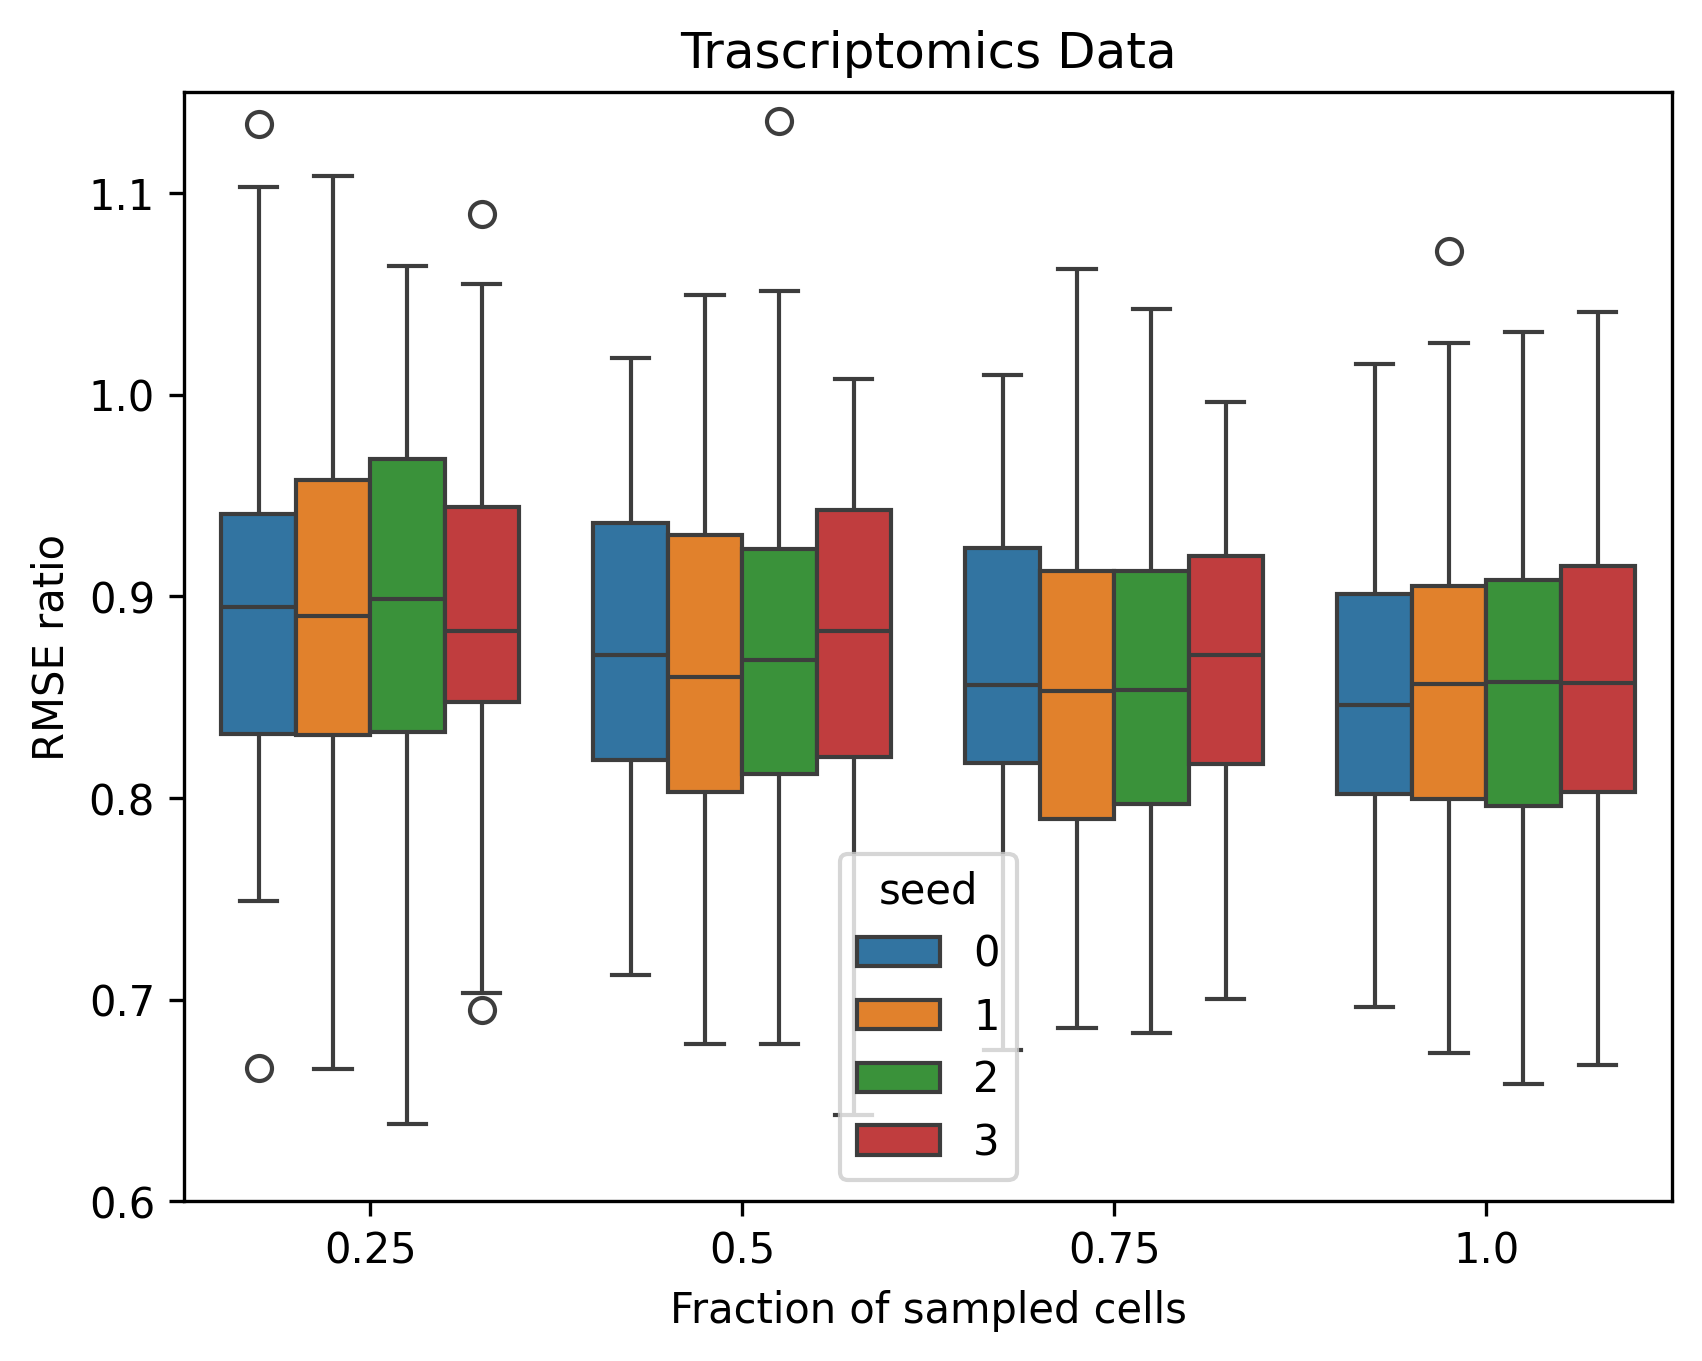

In [12]:
sns.boxplot(data=dfm, y='RMSE_ratio', x='fraction', hue='seed')
plt.ylabel('RMSE ratio')
plt.ylim(0.6, 1.15)
plt.xlabel('Fraction of sampled cells')
plt.title('Trascriptomics Data')

Text(0.5, 0, 'Fraction of sampled cells')

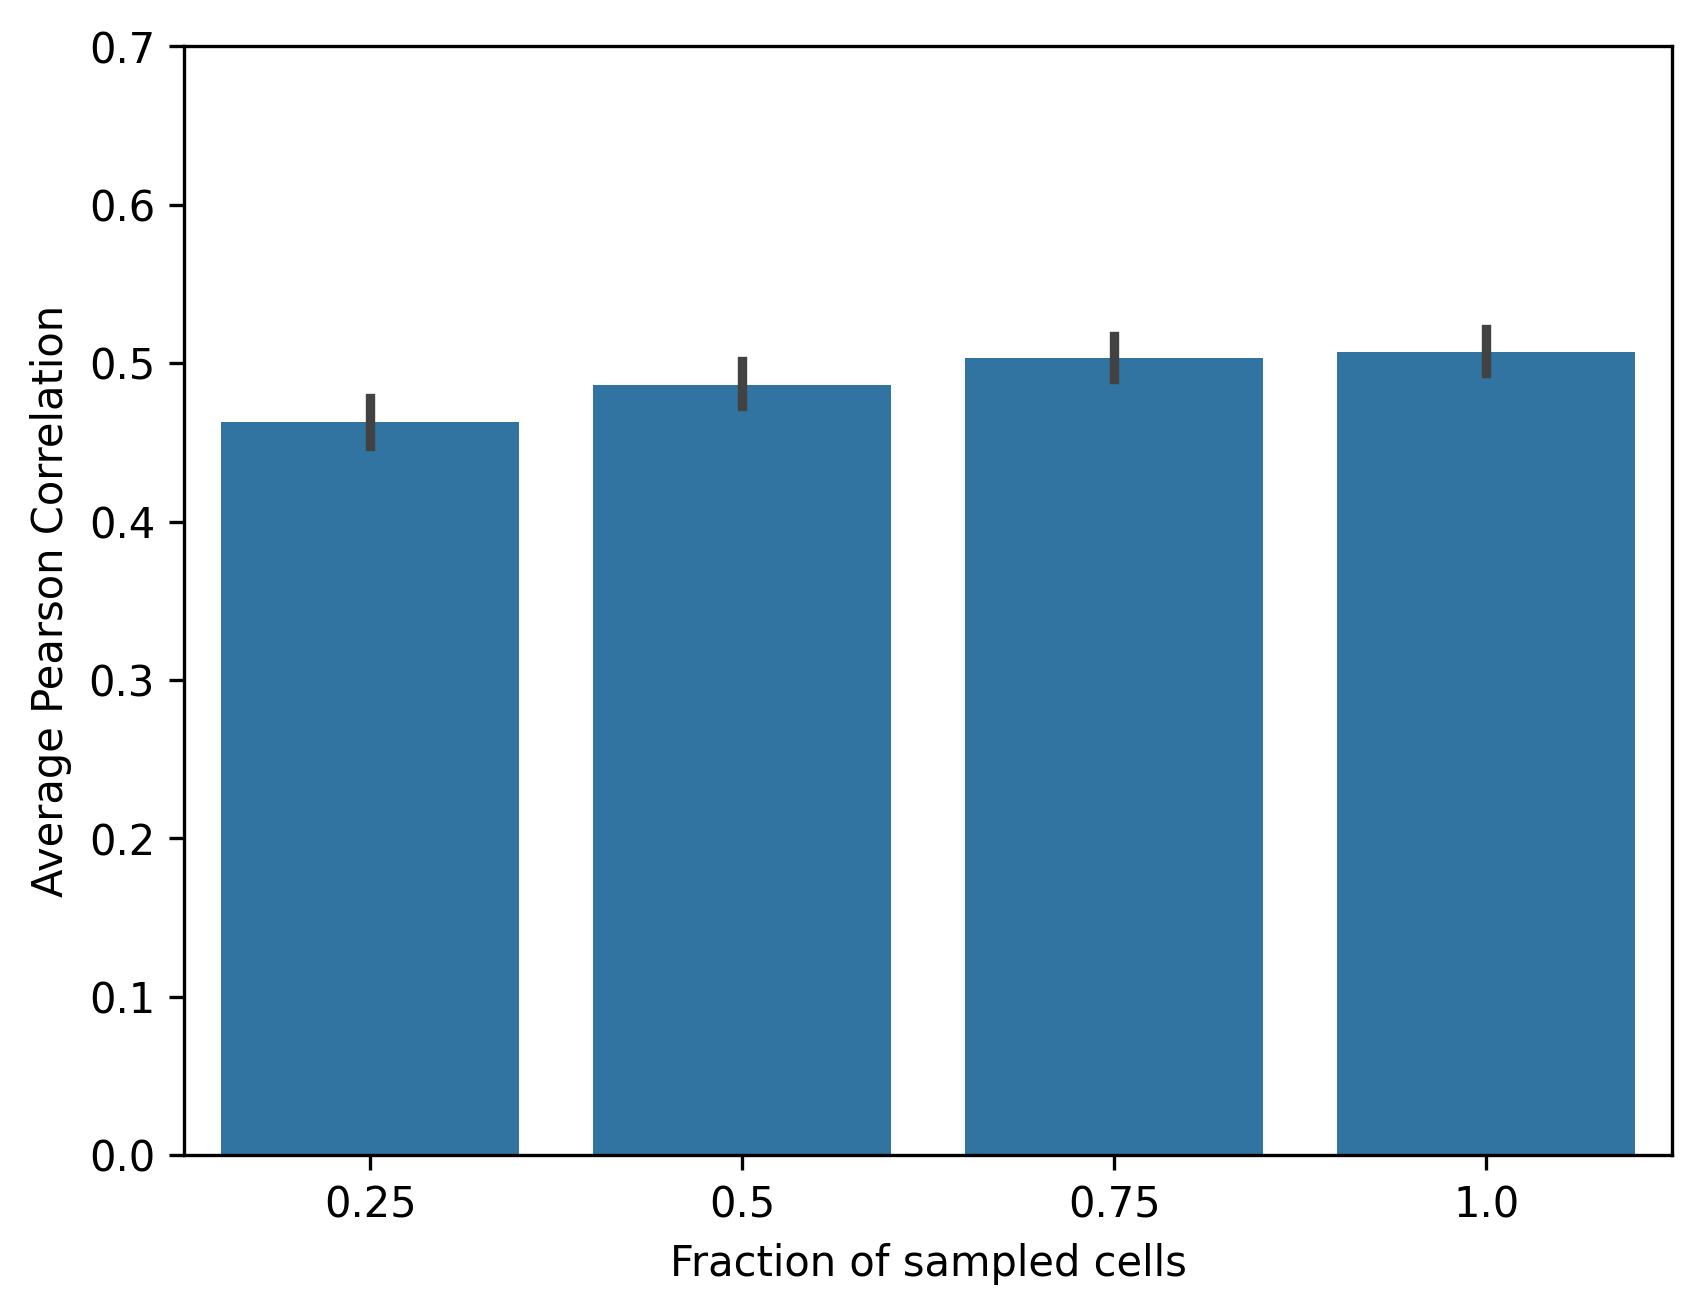

In [13]:
sns.barplot(data=dfm, x='fraction', y='pearsons')
plt.ylim(0.0, 0.7)
plt.ylabel('Average Pearson Correlation')
plt.xlabel('Fraction of sampled cells')

Text(0.5, 0, 'Fraction of sampled cells')

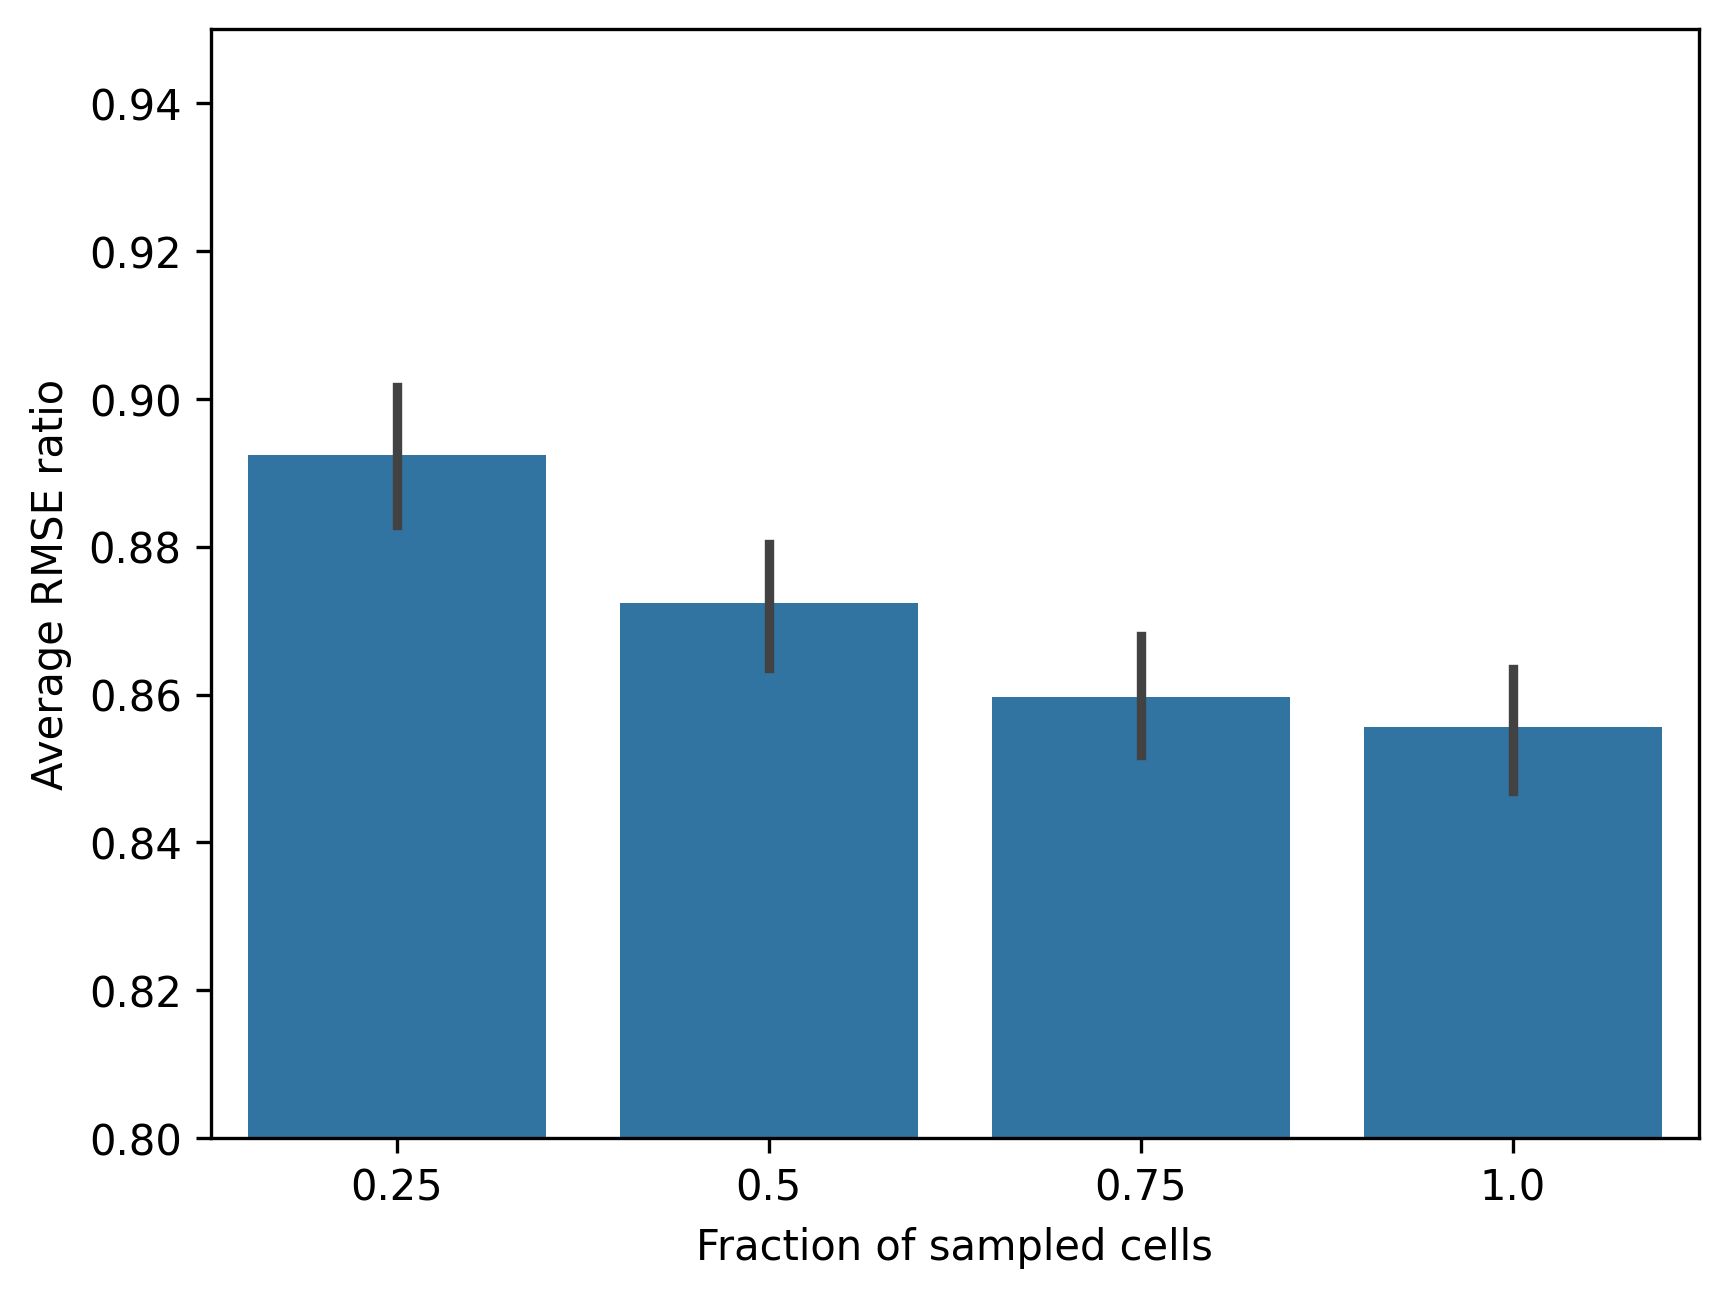

In [14]:
sns.barplot(data=dfm, x='fraction', y='RMSE_ratio')
plt.ylim(0.8, 0.95)
plt.ylabel('Average RMSE ratio')
plt.xlabel('Fraction of sampled cells')

In [15]:
dfm[dfm['fraction']==0.25]['pearsons'].mean()

0.46269169605416083

In [16]:
dfm[dfm['fraction']==1]['pearsons'].mean()

0.5069477641768801

In [17]:
dfm[dfm['fraction']==1]['pearsons'].median()

0.5275326368751112

In [18]:
dfm[dfm['fraction']==0.25]['RMSE_ratio'].mean()

0.8923560937420939

In [19]:
dfm[dfm['fraction']==1]['RMSE_ratio'].mean()

0.8555847197838163

In [23]:
dfm[dfm['fraction']==0.25]['n_ccls'].mean()

125.36338028169014

In [24]:
dfm[dfm['fraction']==1]['n_ccls'].mean()

364.93617021276594